In [2]:
import sys
import os
from matplotlib import axis

sys.path.append(os.path.abspath('..'))

from models.actions.MotionState import MotionState
from models.actions.VerticalActionSequence import VerticalActionSequence
from models.actions.HorizontalActionSeries import HorizontalActionSequence
from models.actions.JumpActionSets import JumpActionSets

from utils.tools import *
from models.level.BlockMap import BlockMap
from models.level.LevelLoader import LevelLoader
from utils.PlotTools import PlotTools

from models.player.PlayerConstants import PlayerConstants
from utils.Rect import Rect
from utils.Vec import Vec
from models.filter.BlockContactFilter import BlockContactFilter
from models.level.BlockType import BlockType
from models.actions.JumpActionNodeList import JumpActionNodeList
from models.actions.MergedHorizontalActionSequence import MergedHorizontalActionSequence
from models.actions.JumpActionSequence import JumpActionSequence
from models.actions.JumpActionNode import JumpActionNode

In [3]:
vSequence = VerticalActionSequence(
    testName    = 'VerticalGroundJumpTests', 
    scenario    = 'Jump_15', 
    time_start  = 0, 
    time_end    = 44, 
    motionState = MotionState.OnGround
)

print(vSequence)

with open(f'{dataAnalysisRoot}/LatexTables/VerticalGroundJumpTests.tex', 'w') as file:
    vSequence.Data.to_latex(file)

Jump_15:           [MotionState.OnGround|45 steps


In [4]:
from models.player.PlayerAction import PlayerAction


startHSequence = HorizontalActionSequence(
    testName    = 'HorizontalAirAccelerationTests', 
    scenario    = 'Idle -> Sprint', 
    time_start  = 0, 
    time_end    = 0, 
    motionState = MotionState.InAir
)
startHSequence.Data['Action'] = PlayerAction.Nothing

accHSequence = HorizontalActionSequence(
    testName    = 'HorizontalAirAccelerationTests', 
    scenario    = 'Idle -> Sprint', 
    time_start  = 0, 
    time_end    = 22, 
    motionState = MotionState.InAir
)

stopHSequence = HorizontalActionSequence(
    testName    = 'HorizontalAirStopTests', 
    scenario    = 'Sprint -> Idle', 
    time_start  = 0, 
    time_end    = 10, 
    motionState = MotionState.InAir
)

# with open(f'{dataAnalysisRoot}/LatexTables/HorizontalAccelerationTests.tex', 'w') as file:
#     series.Data.to_latex(file)

In [5]:
jumpActionSets = JumpActionSets()


In [6]:
idleGroundJumpSequences = jumpActionSets.getGroundJumps().getActionSequences()

idleGroundNodeList = JumpActionNodeList.fromActionSequences(
    actionSequences = idleGroundJumpSequences, 
    addNormal       = True, 
    addInverted     = True
)

wallNodeList = JumpActionNodeList.fromActionSequences(jumpActionSets.getWallJumps().getActionSequences(), addNormal=True, addInverted=False)

In [7]:
print(idleGroundNodeList)
print('highest ground id', max([n.id for n in idleGroundNodeList.nodes]))

print(wallNodeList)
print('highest wall id', max([n.id for n in wallNodeList.nodes]))

ActionNodeList: 5588
highest ground id 268718
ActionNodeList: 3294
highest wall id 380070


In [8]:
print(len((jumpActionSets.getGroundJumps().getActionSequences())))
print(len((jumpActionSets.getWallJumps().getActionSequences())))

2794
3294


In [9]:

print('highest ground id', max([n.id for n in idleGroundNodeList.nodes]))

print(wallNodeList)
print('highest wall id', max([n.id for n in wallNodeList.nodes]))

highest ground id 268718
ActionNodeList: 3294
highest wall id 380070


In [19]:
mergedHSequence = MergedHorizontalActionSequence('GroundJump Long Idle->Idle', hSequences=[
    startHSequence,
    accHSequence,
    stopHSequence
])

frames = list(mergedHSequence.iter(extensions=[0, 0, 0], maxLength=50))
# frames

In [20]:
actionSequence1 = JumpActionSequence(
    vSequenceIter=vSequence.iter(maxLength=None), 
    hSequenceIter=mergedHSequence.iter(extensions=[0, 0, 0], maxLength=None)
)
actionSequence2 = JumpActionSequence(
    vSequenceIter=vSequence.iter(maxLength=None), 
    hSequenceIter=mergedHSequence.iter(extensions=[10, 10, 10], maxLength=55)
)


# with open(f'{dataAnalysisRoot}/LatexTables/ActionSequence.tex', 'w') as file:
#     actionSequence.toDataFrame().to_latex(file)


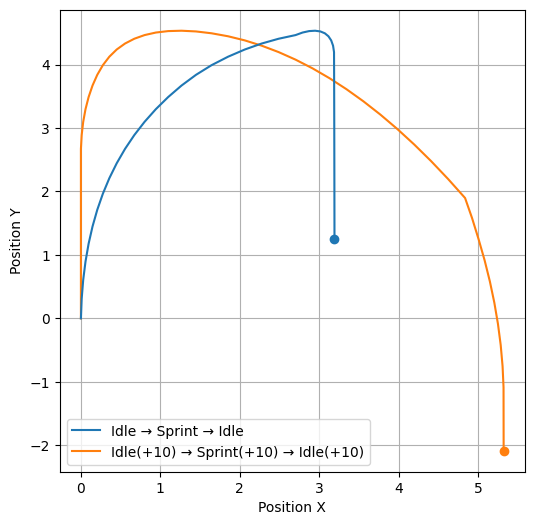

In [24]:
plot = PlotTools.create(cols=1, facecolor='white')
plot.addGrid()

def plotSequence(actionSequence, label, **kwargs):
    df = actionSequence.toDataFrame()
    x = (df['VelocityX'].cumsum() / 60).values
    y = (df['VelocityY'].cumsum() / 60).values
    plot.axis[0].plot(x, y, label=label, **kwargs)
    plot.axis[0].scatter(x[-1], y[-1], marker='o', **kwargs)
    plot.axis[0].set_xlabel('Position X')
    plot.axis[0].set_ylabel('Position Y')

    # time = np.arange(0, len(df))
    # vx = df['VelocityX']
    # vy = df['VelocityY']
    # plot.axis[1].plot(time, vy, label=label, **kwargs)
    # plot.axis[1].set_xlabel('Time')
    # plot.axis[1].set_ylabel('Velocity Y')
    # plot.axis[2].plot(time, vx, label=label, **kwargs)
    # plot.axis[2].set_xlabel('Time')
    # plot.axis[2].set_ylabel('Velocity X')

plotSequence(actionSequence1, 'Idle \u2192 Sprint \u2192 Idle', zorder=3)
plotSequence(actionSequence2, 'Idle(+10) \u2192 Sprint(+10) \u2192 Idle(+10)', zorder=2)
plot.axis[0].legend()

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/IdleSprintIdleJumpActionSequence.png', dpi=300, bbox_inches='tight')

In [12]:
print('ActionSequence1: ('+','.join([str(row.action.value).rjust(2, '0') for row in actionSequence1.iter()])+')')
print('ActionSequence2: ('+','.join([str(row.action.value).rjust(2, '0') for row in actionSequence2.iter()])+')')
print('ActionSequence3: ('+','.join([str(row.action.value).rjust(2, '0') for row in actionSequence3.iter()])+')')
print('ActionSequence4: ('+','.join([str(row.action.value).rjust(2, '0') for row in actionSequence4.iter()])+')')

ActionSequence1: (50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,34,34,34,34,34,34,34,01,01,01,33,33,33,33,33,33,33,00,00,00,00,00,00,00,00,00,00,00,00,00)
ActionSequence2: (50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,34,34,34,34,34,34,34,01,01,01,33,33,33,33,33,33,33,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00)
ActionSequence3: (50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,01,01,01,33,33,33,33,33,33,33,00,00,00)
ActionSequence4: (50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,01,01,01,33,33,33,33,33,33,33,00,00,00,00,00,00,00,00,00,00,00,00,00)


In [13]:

jumpActionSets.vData = [d for i, d in enumerate(jumpActionSets.vData) if i % 5 == 0]

10


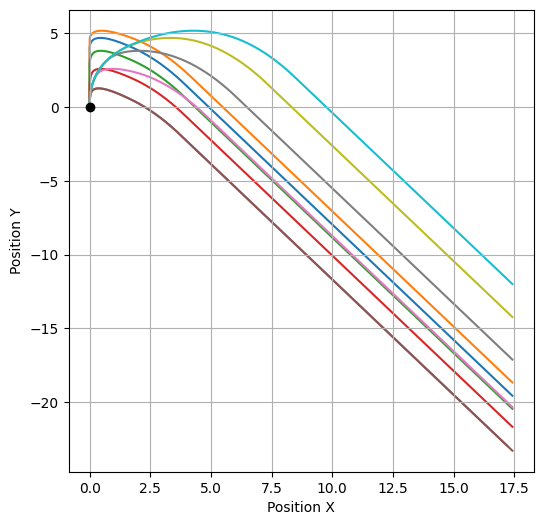

In [14]:

jumpSets = jumpActionSets.getGroundIdleSprintJumps(70)


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundIdleSprintJumps.png', dpi=300, bbox_inches='tight')
print(len(actionList))

5


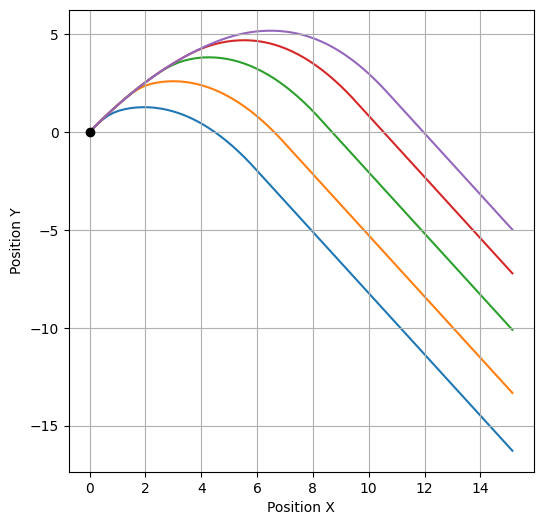

In [15]:

jumpSets = jumpActionSets.getGroundSprintSprintJumps(70)


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundSprintSprintJumps.png', dpi=300, bbox_inches='tight')
print(len(actionList))

20


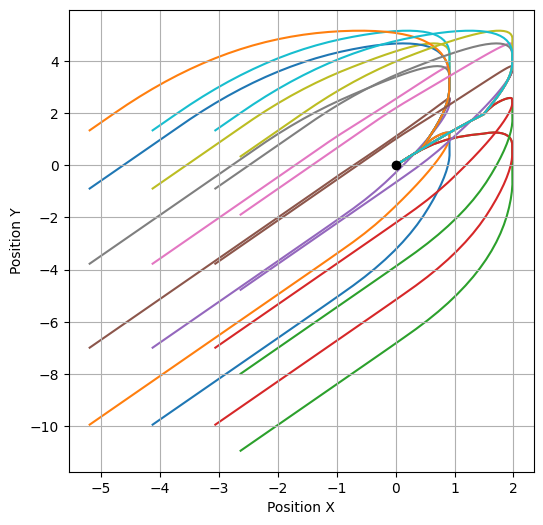

In [16]:

jumpSets = jumpActionSets.getGroundSprintIdleTurn([
                    range(1, 7, 5),
                    range(1, 7, 5),
                    [10]
                ])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundSprintIdleTurn.png', dpi=300, bbox_inches='tight')
print(len(actionList))

40


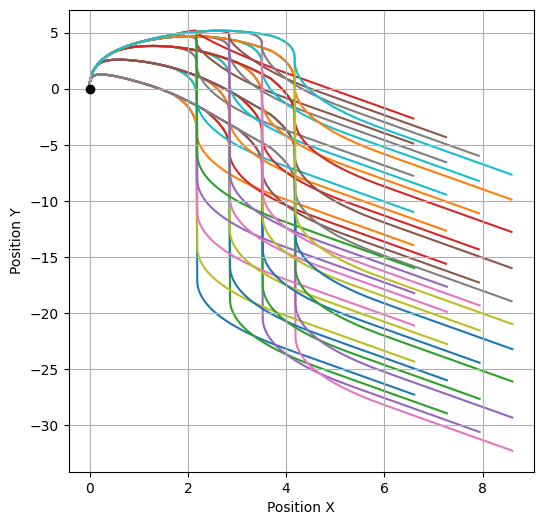

In [17]:

jumpSets = jumpActionSets.getShortGroundIdleIdleForwardJumps([
    [0],
    range(0, 20, 5),
    range(0, 70, 40),
    [10]
])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundIdleIdleForwardJumps.png', dpi=300, bbox_inches='tight')
print(len(actionList))

40


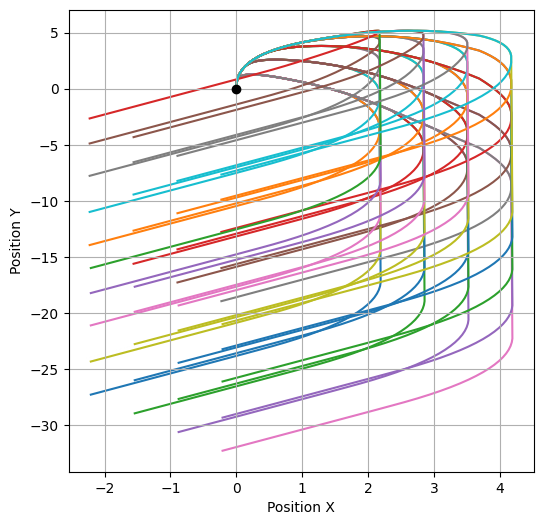

In [18]:

jumpSets = jumpActionSets.getShortGroundIdleIdleBackwardJumps([
    [0],
    range(0, 20, 5),
    range(0, 70, 40),
    [10]
])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundIdleIdleBackwardJumps.png', dpi=300, bbox_inches='tight')
print(len(actionList))

20


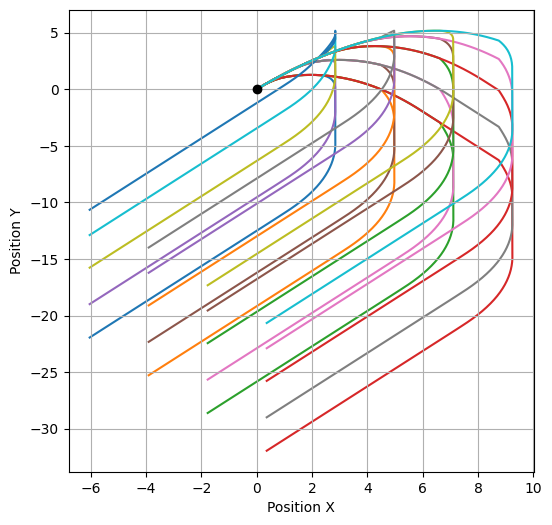

In [19]:

jumpSets = jumpActionSets.getGroundSprintIdleTurn([
                    range(10, 50, 10),
                    range(15, 16, 40),
                    [30]
                ])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/GroundSprintIdleTurn2.png', dpi=300, bbox_inches='tight')
print(len(actionList))

18


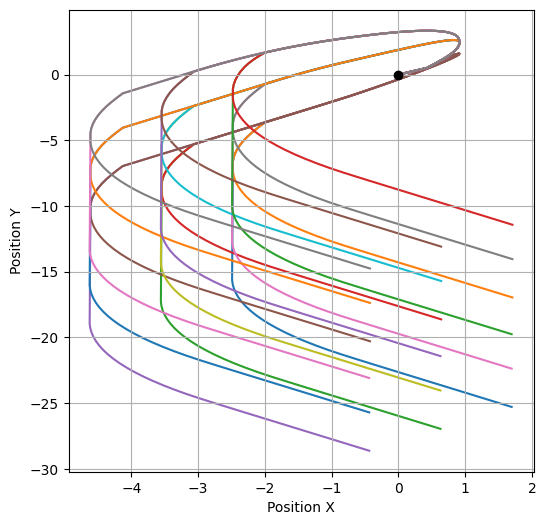

In [20]:

jumpSets = jumpActionSets.getWallJumpsForwardTurnIdleTurn([
                    range(0, 1, 1),
                    range(0, 1, 1),
                    range(0, 11, 5),
                    range(0, 41, 25),
                    [10],
                ])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/WallJumpsForwardTurnIdleTurn.png', dpi=300, bbox_inches='tight')
print(len(actionList))

18


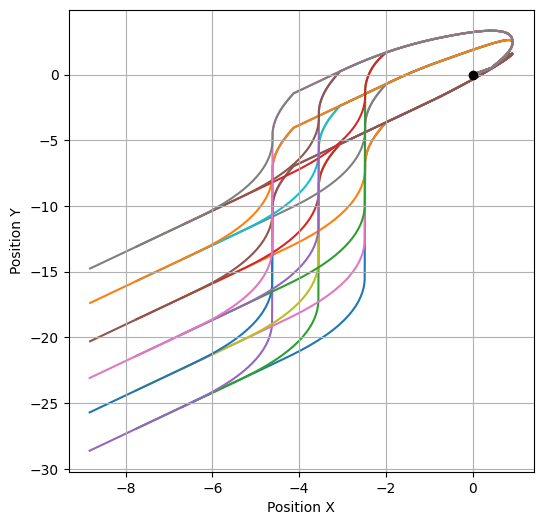

In [21]:

jumpSets = jumpActionSets.getWallJumpsForwardTurnIdleBack([
                    range(0, 1, 1),
                    range(0, 1, 1),
                    range(0, 11, 5),
                    range(0, 41, 25),
                    [10],
                ])


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/WallJumpsForwardTurnIdleBack.png', dpi=300, bbox_inches='tight')
print(len(actionList))

18


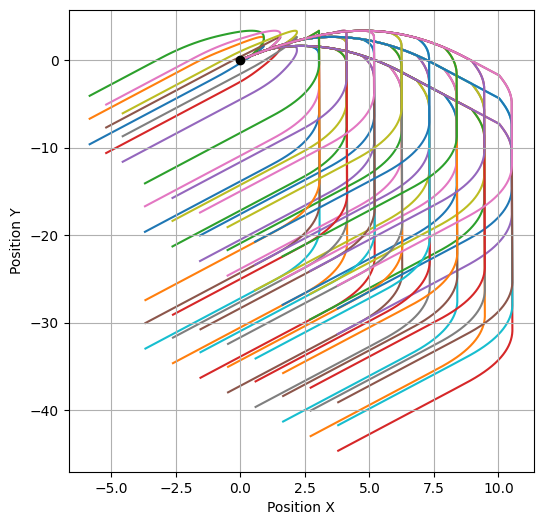

In [22]:

jumpSets1 = jumpActionSets.getWallJumpsForwardTurn([
                    range(0, 7, 3),
                    range(0, 5, 5),
                    [20],
                ])

jumpSets2 = jumpActionSets.getWallJumpsForwardTurn([
                    range(10, 50, 5),
                    range(20, 100, 40),
                    [20],
                ])
actionList1 = JumpActionNodeList.fromActionSequences(jumpSets1, addNormal=True, addInverted=False)
actionList2 = JumpActionNodeList.fromActionSequences(jumpSets2, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList1.nodes)
plot.plotNodes(actionList2.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/WallJumpsForwardTurn.png', dpi=300, bbox_inches='tight')

print(len(actionList))

18


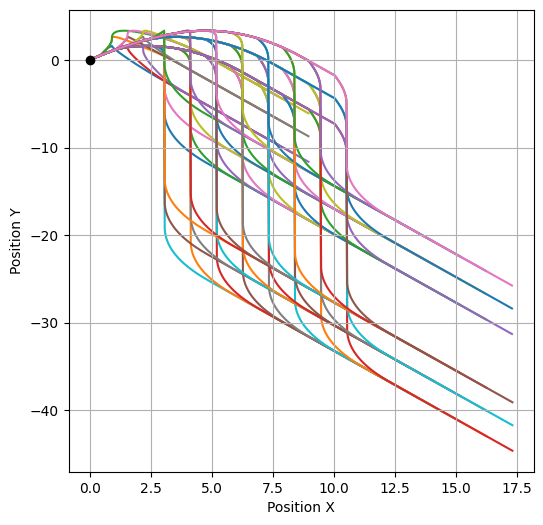

In [23]:

jumpSets1 = jumpActionSets.getWallJumpsForwardStopForward([
                    range(0, 7, 3),
                    range(0, 5, 5),
                    [20],
                ])

jumpSets2 = jumpActionSets.getWallJumpsForwardStopForward([
                    range(10, 50, 5),
                    range(20, 100, 40),
                    [20],
                ])
actionList1 = JumpActionNodeList.fromActionSequences(jumpSets1, addNormal=True, addInverted=False)
actionList2 = JumpActionNodeList.fromActionSequences(jumpSets2, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(actionList1.nodes)
plot.plotNodes(actionList2.nodes)
plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/WallJumpsForwardIdleForward.png', dpi=300, bbox_inches='tight')

print(len(actionList))

22


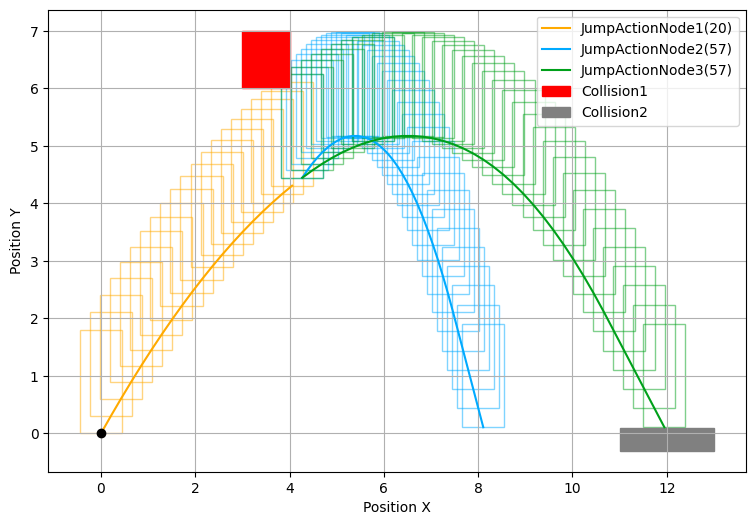

In [11]:

jumpSets = jumpActionSets.getGroundSprintSprintJumps(70)


actionList = JumpActionNodeList.fromActionSequences(jumpSets, addNormal=True, addInverted=False)

plot = PlotTools.create(facecolor='white', figsize=(9, 6))
plot.addGrid()

for actionNode in actionList.nodes[-1:]:
    nodes = actionNode.branchNodes[:20]
    x = [node.position.x for node in nodes]
    y = [node.position.y for node in nodes]
    plot.axis[0].plot(x, y, color='#FFAA00', label='JumpActionNode1(20)')
    for node in nodes:
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor='#FFAA00', alpha=0.5)
        
    nodes = actionNode.branchNodes[20:57]
    x = [nodes[0].position.x / 2 + node.position.x /2 for node in nodes]
    y = [node.position.y for node in nodes]
    plot.axis[0].plot(x, y, color='#00aaff', label='JumpActionNode2(57)')
    for i in range(len(nodes)):
        plot.plotRectangle(PlayerConstants.playerRect.offset(Vec([x[i], y[i]])), edgeColor='#00aaff', alpha=0.5)
        
    nodes = actionNode.branchNodes[20:57]
    x = [node.position.x for node in nodes]
    y = [node.position.y for node in nodes]
    plot.axis[0].plot(x, y, color='#00A01A', label='JumpActionNode3(57)')
    for node in nodes:
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor='#00A01A', alpha=0.5)


plot.plotRectangle(Rect([0, 0, 1, 1]).offset(Vec([3, 6])), color='red', label='Collision1')
plot.plotRectangle(Rect([0, 0, 2, 0.4]).offset(Vec([11, -0.3])), color='gray', label='Collision2')

plot.axis[0].plot([0], [0], 'o', color='black')
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')
plot.axis[0].legend()

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/ActionFrameOverlap.png', dpi=300, bbox_inches='tight')
print(len(actionList))

In [25]:
groundNodeMap = JumpActionNode(
    name='Test', 
    nodes=idleGroundNodeList, 
    interpolateSteps=0, 
    forceCreate=False
)

In [26]:
groundNodeMap

ActionNodeMap (Test, 275465), [ActionNodeList: 5588]

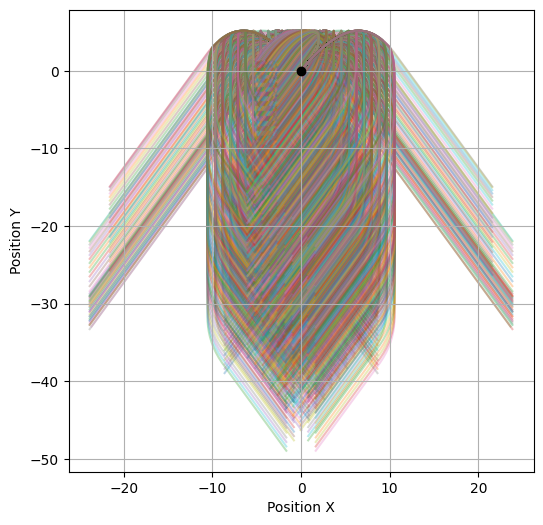

In [27]:

plot = PlotTools.create(facecolor='white')
plot.addGrid()
plot.plotNodes(idleGroundNodeList.nodes, alpha=0.3)
plot.axis[0].set_xlabel('Position X')
plot.axis[0].set_ylabel('Position Y')
plot.axis[0].plot([0], [0], 'o', color='black')
plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/JumpActionNodeMap.png', dpi=300, bbox_inches='tight')

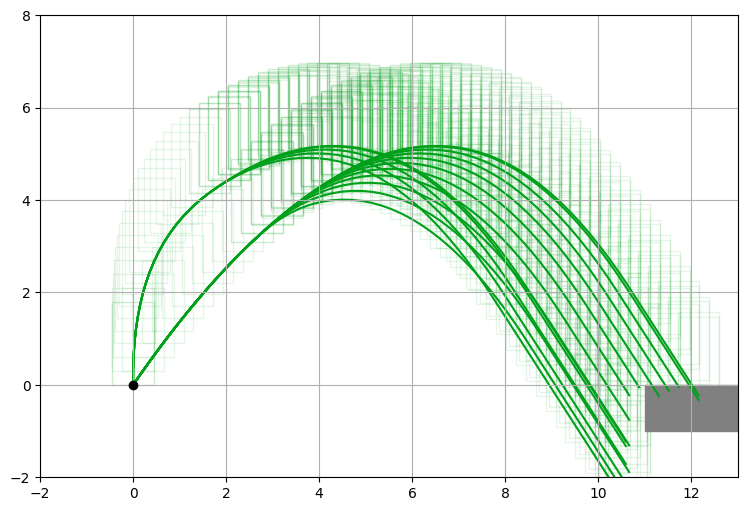

In [28]:

color = '#00A01A'

rectangles = [
    Rect([0, 0, 2, 1]).offset(Vec([11, -1])),
]

blockFilter = BlockContactFilter(
    nodeMap=groundNodeMap, 
    rectangles=rectangles, 
    invert=False
)

filteredNodes = list(blockFilter(idleGroundNodeList.nodes))

plot = PlotTools.create(facecolor='white', figsize=(9, 6))
plot.addGrid()
plot.axis[0].set_xlim(-2, 13)
plot.axis[0].set_ylim(-2, 8)

seenNodes = set()


for actionNode in filteredNodes:
    nodes = actionNode.branchNodes#[:20]
    # x = [node.position.x for node in nodes]
    # y = [node.position.y for node in nodes]
    # plot.axis[0].plot(x, y, color='#FFAA00', label='ActionNode1(20)')
    for node in nodes:
        if node.fullKey in seenNodes:
            continue
        seenNodes.add(node.fullKey)
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor=color, alpha=0.1)

for rectangle in rectangles:
    plot.plotRectangle(rectangle, color='gray')
plot.plotNodes(filteredNodes, color=color)
plot.axis[0].plot([0], [0], 'o', color='black')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/BlockContactFilter1.png', dpi=300, bbox_inches='tight')

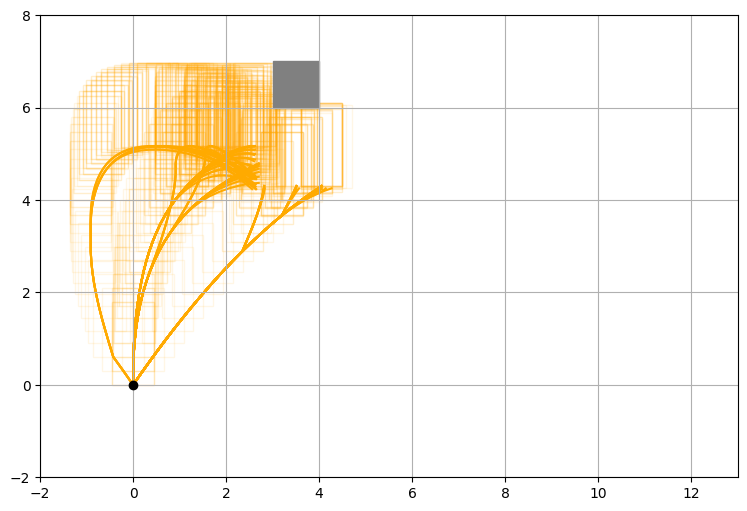

In [29]:

color = '#FFAA00'

rectangles = [
    Rect([0, 0, 1, 1]).offset(Vec([3, 6])),
    # Rect([0, 0, 2, 0.4]).offset(Vec([11, -0.3])),
]

blockFilter = BlockContactFilter(
    nodeMap=groundNodeMap, 
    rectangles=rectangles, 
    invert=False
)

filteredNodes = list(blockFilter(idleGroundNodeList.nodes))

plot = PlotTools.create(facecolor='white', figsize=(9, 6))
plot.addGrid()
plot.axis[0].set_xlim(-2, 13)
plot.axis[0].set_ylim(-2, 8)

seenNodes = set()


for actionNode in filteredNodes:
    nodes = actionNode.branchNodes#[:20]
    # x = [node.position.x for node in nodes]
    # y = [node.position.y for node in nodes]
    # plot.axis[0].plot(x, y, color='#FFAA00', label='ActionNode1(20)')
    for node in nodes:
        if node.fullKey in seenNodes:
            continue
        seenNodes.add(node.fullKey)
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor=color, alpha=0.1)

for rectangle in rectangles:
    plot.plotRectangle(rectangle, color='gray')
plot.plotNodes(filteredNodes, color=color)
plot.axis[0].plot([0], [0], 'o', color='black')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/BlockContactFilter2.png', dpi=300, bbox_inches='tight')

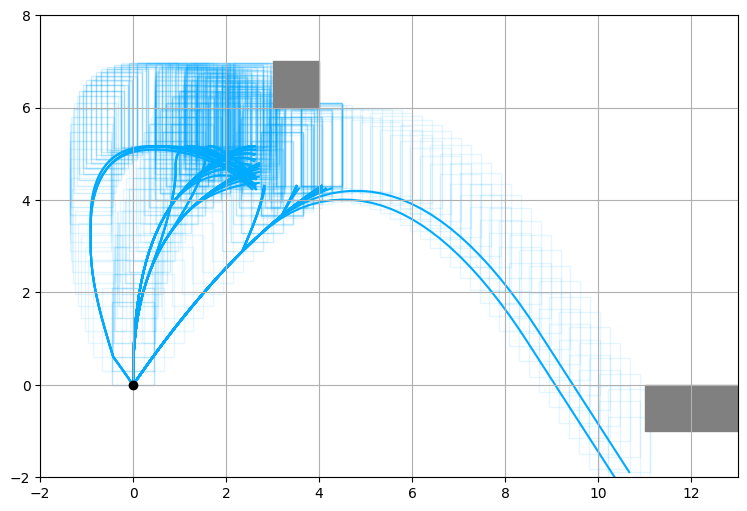

In [30]:

color = '#00aaff'

rectangles = [
    Rect([0, 0, 1, 1]).offset(Vec([3, 6])),
    Rect([0, 0, 2, 1]).offset(Vec([11, -1])),
]

blockFilter = BlockContactFilter(
    nodeMap=groundNodeMap, 
    rectangles=rectangles, 
    invert=False
)

filteredNodes = list(blockFilter(idleGroundNodeList.nodes))

plot = PlotTools.create(facecolor='white', figsize=(9, 6))
plot.addGrid()
plot.axis[0].set_xlim(-2, 13)
plot.axis[0].set_ylim(-2, 8)

seenNodes = set()

for actionNode in filteredNodes:
    nodes = actionNode.branchNodes#[:20]
    # x = [node.position.x for node in nodes]
    # y = [node.position.y for node in nodes]
    # plot.axis[0].plot(x, y, color='#FFAA00', label='ActionNode1(20)')
    for node in nodes:
        if node.fullKey in seenNodes:
            continue
        seenNodes.add(node.fullKey)
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor=color, alpha=0.1)

for rectangle in rectangles:
    plot.plotRectangle(rectangle, color='gray')
plot.plotNodes(filteredNodes, color=color)
plot.axis[0].plot([0], [0], 'o', color='black')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/BlockContactFilter3.png', dpi=300, bbox_inches='tight')

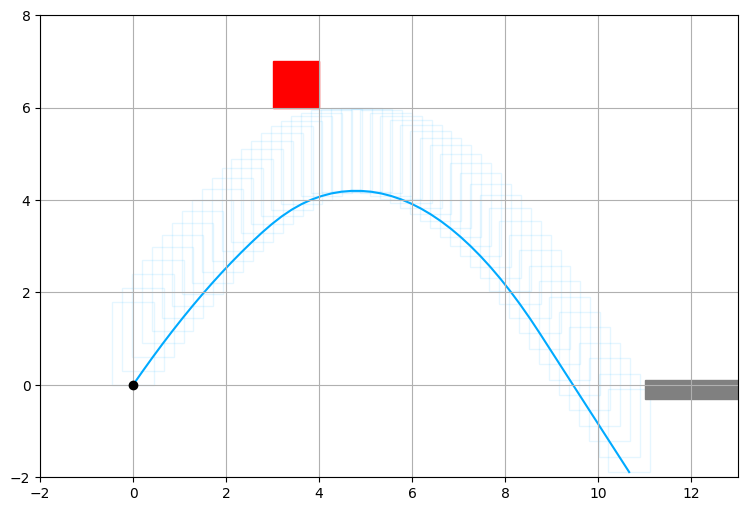

In [31]:

color = '#00aaff'

rectangles = [
    Rect([0, 0, 2, 0.4]).offset(Vec([11, -0.3])),
]
obstacles = [
    Rect([0, 0, 1, 1]).offset(Vec([3, 6])),
]

blockFilter = BlockContactFilter(
    nodeMap=groundNodeMap, 
    rectangles=rectangles, 
    invert=False
)

obstacleFilter = BlockContactFilter(
    nodeMap=groundNodeMap, 
    rectangles=obstacles, 
    invert=True
)

filteredNodes = list(obstacleFilter(blockFilter(idleGroundNodeList.nodes)))

plot = PlotTools.create(facecolor='white', figsize=(9, 6))
plot.addGrid()
plot.axis[0].set_xlim(-2, 13)
plot.axis[0].set_ylim(-2, 8)

seenNodes = set()

for actionNode in filteredNodes:
    nodes = actionNode.branchNodes#[:20]
    # x = [node.position.x for node in nodes]
    # y = [node.position.y for node in nodes]
    # plot.axis[0].plot(x, y, color='#FFAA00', label='ActionNode1(20)')
    for node in nodes:
        if node.fullKey in seenNodes:
            continue
        seenNodes.add(node.fullKey)
        plot.plotRectangle(PlayerConstants.playerRect.offset(node.position), edgeColor=color, alpha=0.1)

for rectangle in rectangles:
    plot.plotRectangle(rectangle, color='gray')
for rectangle in obstacles:
    plot.plotRectangle(rectangle, color='red')
plot.plotNodes(filteredNodes, color=color)
plot.axis[0].plot([0], [0], 'o', color='black')

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/BlockContactFilter4.png', dpi=300, bbox_inches='tight')

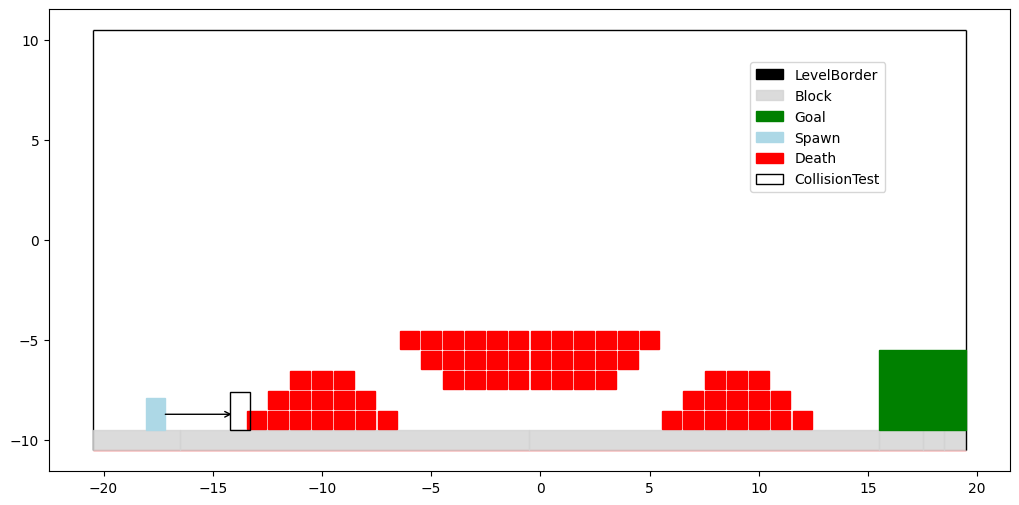

In [37]:


testLevel = LevelLoader.fromLevel('NarrowSpikePathTest', forceCreate=False)
blockMap = BlockMap.fromLevelData(testLevel, resizeGoals=False)

poi = Rect([0,0,0.9,1.9]).offset(Vec([-14.2, -9.47]))

seenTypes = set()
plot = PlotTools.create(facecolor='white', figsize=(12.4, 6))
# plot.addGrid()
for block in blockMap.blocks:
    rect = block.rect
    label = block.type.name
    
    args = {}
    
    if not block.type.isType(BlockType.DeathPit):
        if block.type.isType(BlockType.LevelBorder):
            label = BlockType.LevelBorder.name
        
        if label not in seenTypes:
            seenTypes.add(label)
            args['label'] = label

    if block.type.isType(BlockType.Block):
        args['color'] = 'lightgray'
        args['alpha'] = 0.8
    elif block.type.isType(BlockType.Goal):
        args['color'] = 'green'
        args['alpha'] = 1
    elif block.type.isType(BlockType.Spawn):
        args['color'] = 'lightblue'
        args['alpha'] = 1
    elif block.type.isType(BlockType.Death):
        args['color'] = 'red'
        args['alpha'] = 1
    elif block.type.isType(BlockType.LevelBorder):
        args['color'] = 'black'
        args['alpha'] = 1
    plot.plotRectangle(rect, **args)


plot.axis[0].annotate("", xy=(-14, -8.7), xytext=(-17.3, -8.7), arrowprops=dict(arrowstyle="->", color='black'))

plot.plotRectangle(poi, edgeColor='black', label='CollisionTest')

plot.axis[0].legend(loc='upper center', bbox_to_anchor=(0.8, 0.9))

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/BlockMap.png', dpi=300, bbox_inches='tight')

In [33]:
# poi = Rect([0,0,6,6]).offset(Vec([12, -10]))

for block in blockMap.findBlocks(rectangles=[poi], blockTypes=[BlockType.Block, BlockType.Death]):
    print(block)
    

Death (11) [(-13.45, -9.45), (0.9, 0.9)]


Device used: cpu
Flood fill steps: 98
GoalDistanceEuclidean: Start Position: (-9.6299989, -9.48), Goal Positions: [(9.5, -7.5)], Goal Distance: 19.6
PlotTensor: 0.0 28.429737091064453


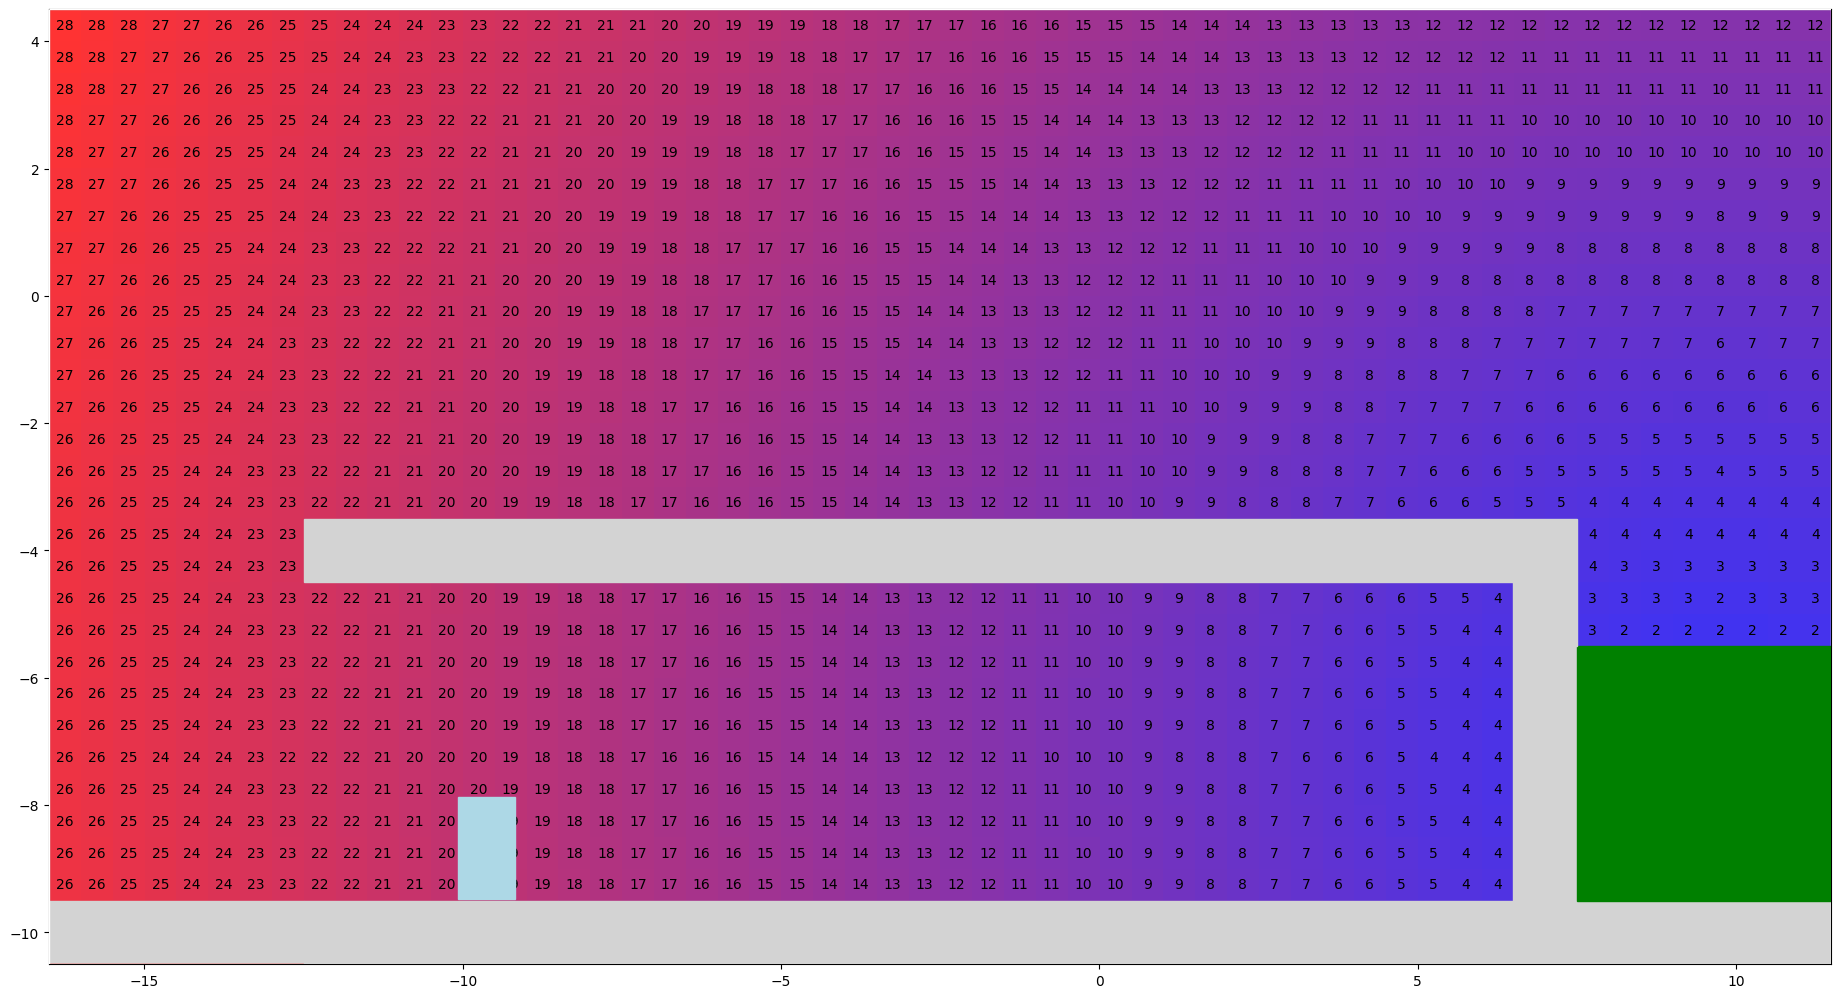

In [5]:
from models.path.ActionPathHeuristic import ActionPathHeuristic, ActionPathHeuristics
levelData = LevelLoader.fromLevel('SmallDeadEnd', forceCreate=False)
blockMap = BlockMap.fromLevelData(levelData, resizeGoals=False)

heuristic = ActionPathHeuristic(
    blockMap, 
    coordinateMultiplier=2,
    heuristic=ActionPathHeuristics.GoalDistanceEuclidean
)

plot = PlotTools.create(figsize=23, facecolor='white')


plot.plotTensor(tensor=heuristic.getDistanceTensor(), colors=['blue', 'red'], plotValues=True, extent=Rect(blockMap.rtree.bounds), alpha=0.8, roundDigits=0)
plot.plotBlocks(blockMap.blocks, alpha=1, zorder=10)

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/ActionPathEuclidHeuristic.png', dpi=300, bbox_inches='tight')

Device used: cpu
Flood fill steps: 98
GoalDistanceManhatten: Start Position: (-9.6299989, -9.48), Goal Positions: [(9.5, -7.5)], Goal Distance: 21.5
PlotTensor: 0 37


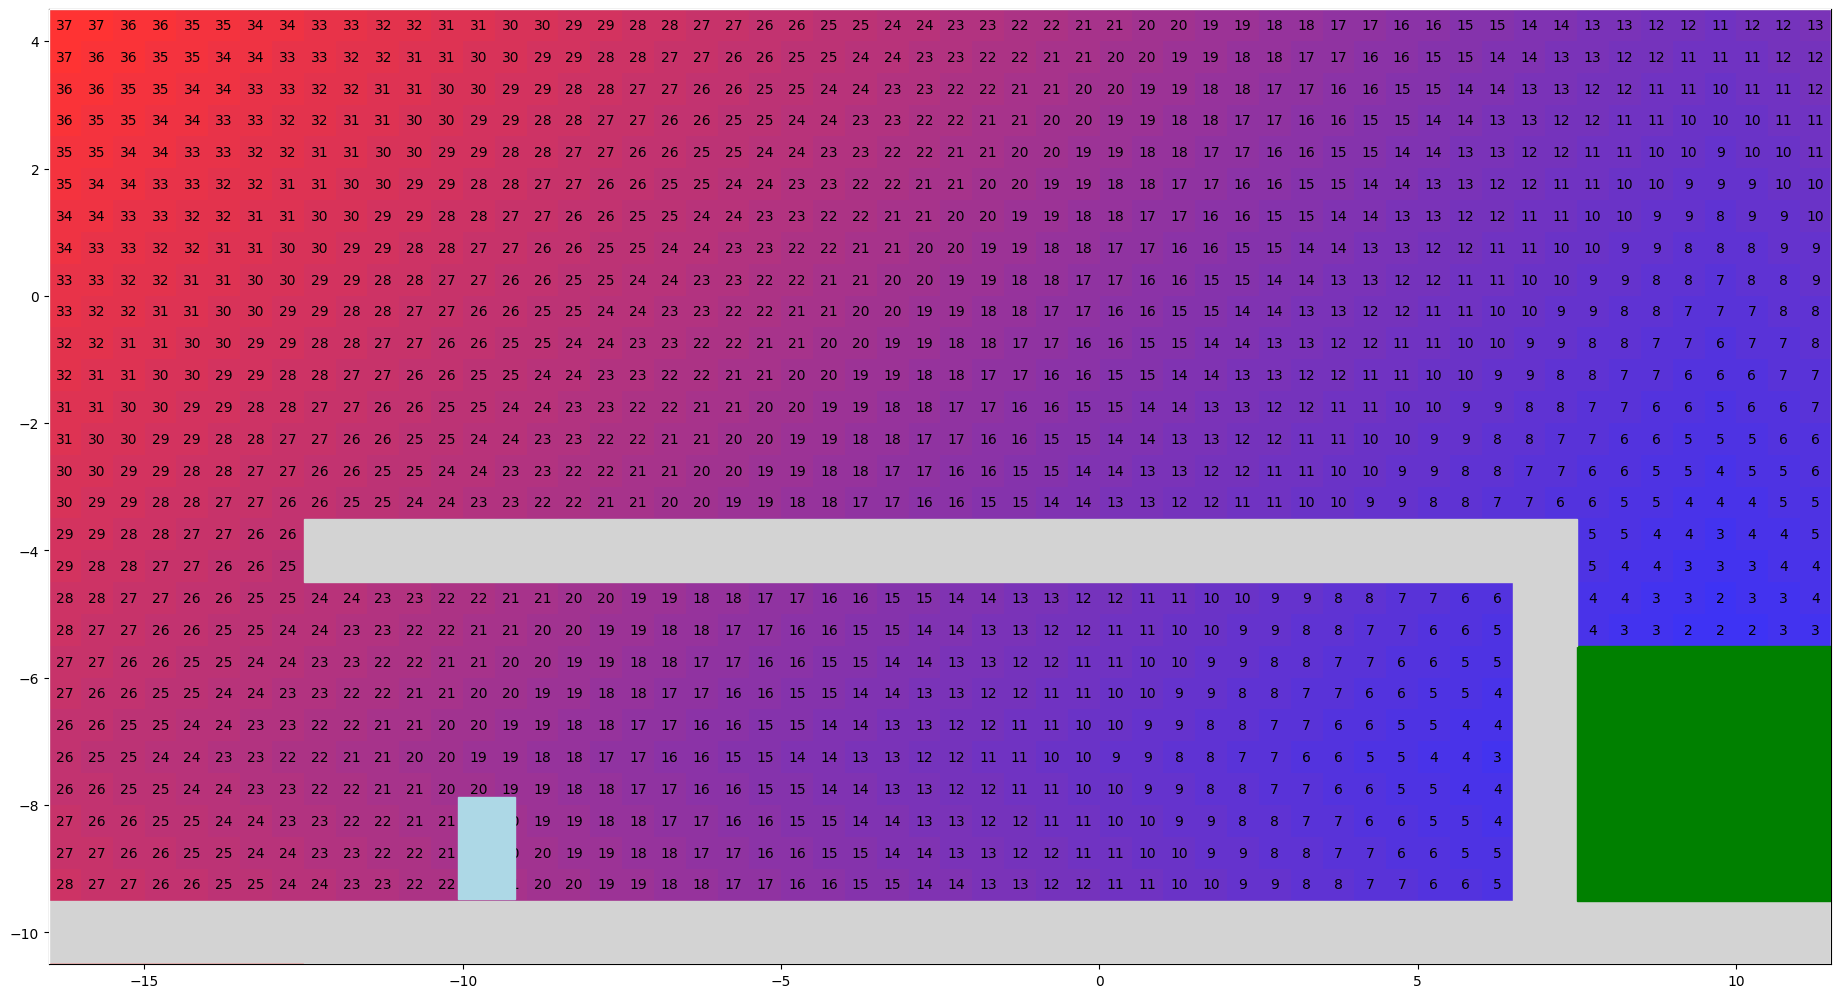

In [40]:
from models.path.ActionPathHeuristic import ActionPathHeuristic, ActionPathHeuristics
levelData = LevelLoader.fromLevel('SmallDeadEnd', forceCreate=False)
blockMap = BlockMap.fromLevelData(levelData, resizeGoals=False)

heuristic = ActionPathHeuristic(
    blockMap, 
    coordinateMultiplier=2,
    heuristic=ActionPathHeuristics.GoalDistanceManhatten
)

plot = PlotTools.create(figsize=23, facecolor='white')


plot.plotTensor(tensor=heuristic.getDistanceTensor(), colors=['blue', 'red'], plotValues=True, extent=Rect(blockMap.rtree.bounds), alpha=0.8)
plot.plotBlocks(blockMap.blocks, alpha=1, zorder=10)

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/ActionPathManhattanHeuristic.png', dpi=300, bbox_inches='tight')

Device used: cpu
Flood fill steps: 98
GoalDistanceFlood: Start Position: (-9.6299989, -9.48), Goal Positions: [(9.5, -7.5)], Goal Distance: 32.5
PlotTensor: 0 48


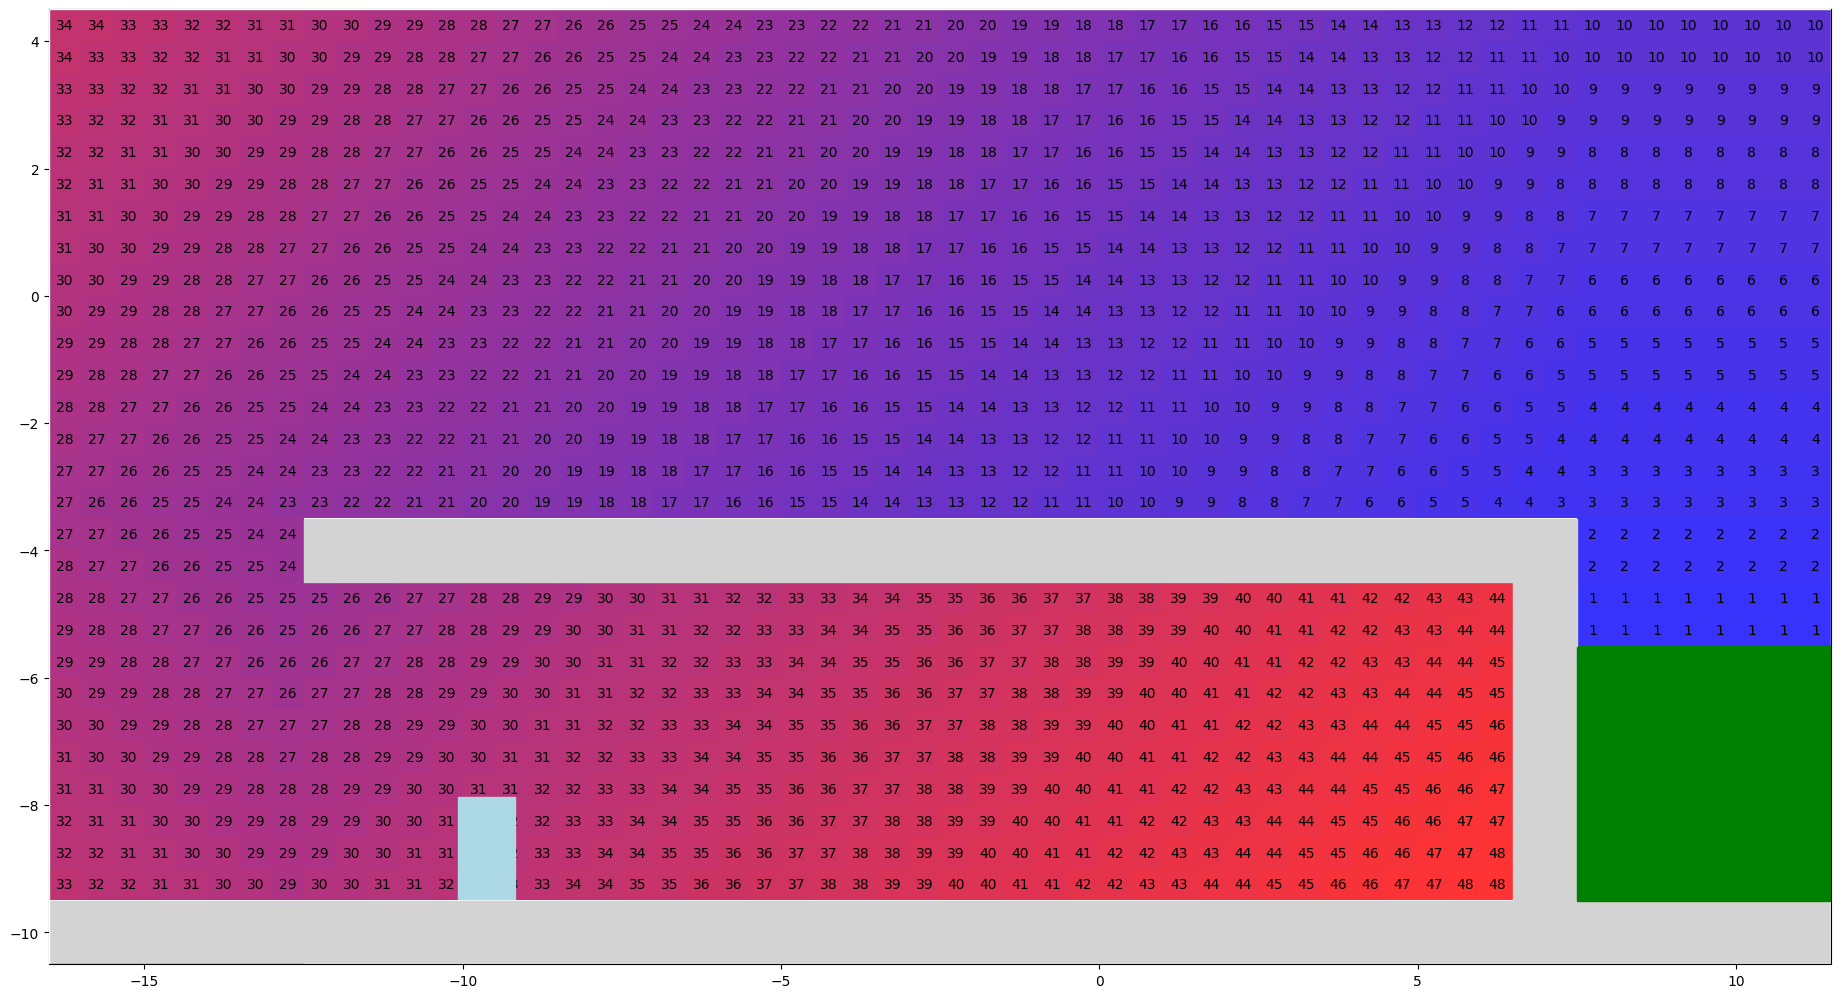

In [35]:
from models.path.ActionPathHeuristic import ActionPathHeuristic, ActionPathHeuristics
levelData = LevelLoader.fromLevel('SmallDeadEnd', forceCreate=False)
blockMap = BlockMap.fromLevelData(levelData, resizeGoals=False)

heuristic = ActionPathHeuristic(
    blockMap, 
    coordinateMultiplier=2,
    heuristic=ActionPathHeuristics.GoalDistanceFlood
)

plot = PlotTools.create(figsize=23, facecolor='white')


plot.plotTensor(tensor=heuristic.getDistanceTensor(), colors=['blue', 'red'], plotValues=True, extent=Rect(blockMap.rtree.bounds), alpha=0.8)
plot.plotBlocks(blockMap.blocks, alpha=1, zorder=10)

plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/ActionPathFloodHeuristic.png', dpi=300, bbox_inches='tight')


In [ ]:
def search(start):
    openList = [start]
    closedList = []
    while len(openList) > 0:
        openList.sort(key=lambda path: path.cost())
        current = openList.pop(0)
        if current in closedList:
            continue
        closedList.append(current)
        if current.isGoal:
            return current
        openList.extend(current.children)
    return None